## **Assignment 1 - Social Data Analysis and Visualization**
# Technical University of Denmark - 27.02.2023

# Part 1: Visualizing patterns in the data 
With a special focus on a set of 14 crimes of the San Francisco crime data, in this exercise we will explore interesting patterns in the data. Specifically, we will:
* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Read in data
data = pd.read_csv('crime.csv')

In [3]:
# Prepare and filter data

# Create a subset of the data with only the crimes we are interested in.
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
data = data[data.Category.isin(focuscrimes)]

# Create a subset of relevant columns
data = data[['PdId', 'Date', 'Time', 'Category', 'Descript', 'PdDistrict', 'Resolution', 'DayOfWeek', 'X', 'Y', 'location']]

# Convert Data to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Make a subset without 2018, as we only look on complete years.
data = data[data["Date"].dt.year != 2018]

# Create relevant datetime variables.
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["MonthOfYear"] = data["Date"].dt.strftime('%b')
data["Day"] = data["Date"].dt.day
data["Hour"] = pd.to_datetime(data["Time"], format = '%H:%M').dt.hour
data["Weekday"] = pd.to_datetime(data.Date).dt.weekday
data["Week_hour"] = data.Weekday*24 + data.Hour

# Display data
data.head()

,PdId,Date,Time,Category,Descript,PdDistrict,Resolution,DayOfWeek,X,Y,location,Year,Month,MonthOfYear,Day,Hour,Weekday,Week_hour
0,4133422003074,2004-11-22,17:50,ROBBERY,"ROBBERY, BODILY FORCE",INGLESIDE,NONE,Monday,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),2004,11,Nov,22,17,0,17
1,5118535807021,2005-10-18,20:00,VEHICLE THEFT,STOLEN AUTOMOBILE,PARK,NONE,Tuesday,-120.500000,90.000000,POINT (-120.50000000000001 90),2005,10,Oct,18,20,1,44
2,4018830907021,2004-02-15,02:00,VEHICLE THEFT,STOLEN AUTOMOBILE,SOUTHERN,NONE,Sunday,-120.500000,90.000000,POINT (-120.50000000000001 90),2004,2,Feb,15,2,6,146
4,10108108004134,2010-11-21,17:00,ASSAULT,BATTERY,SOUTHERN,NONE,Sunday,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),2010,11,Nov,21,17,6,161
5,13027069804134,2013-04-02,15:50,ASSAULT,BATTERY,TARAVAL,NONE,Tuesday,-122.470366,37.745158,POINT (-122.470365997562 37.74515794927),2013,4,Apr,2,15,1,39


# Plot of days of the week, months, hours of the day and hours of the week

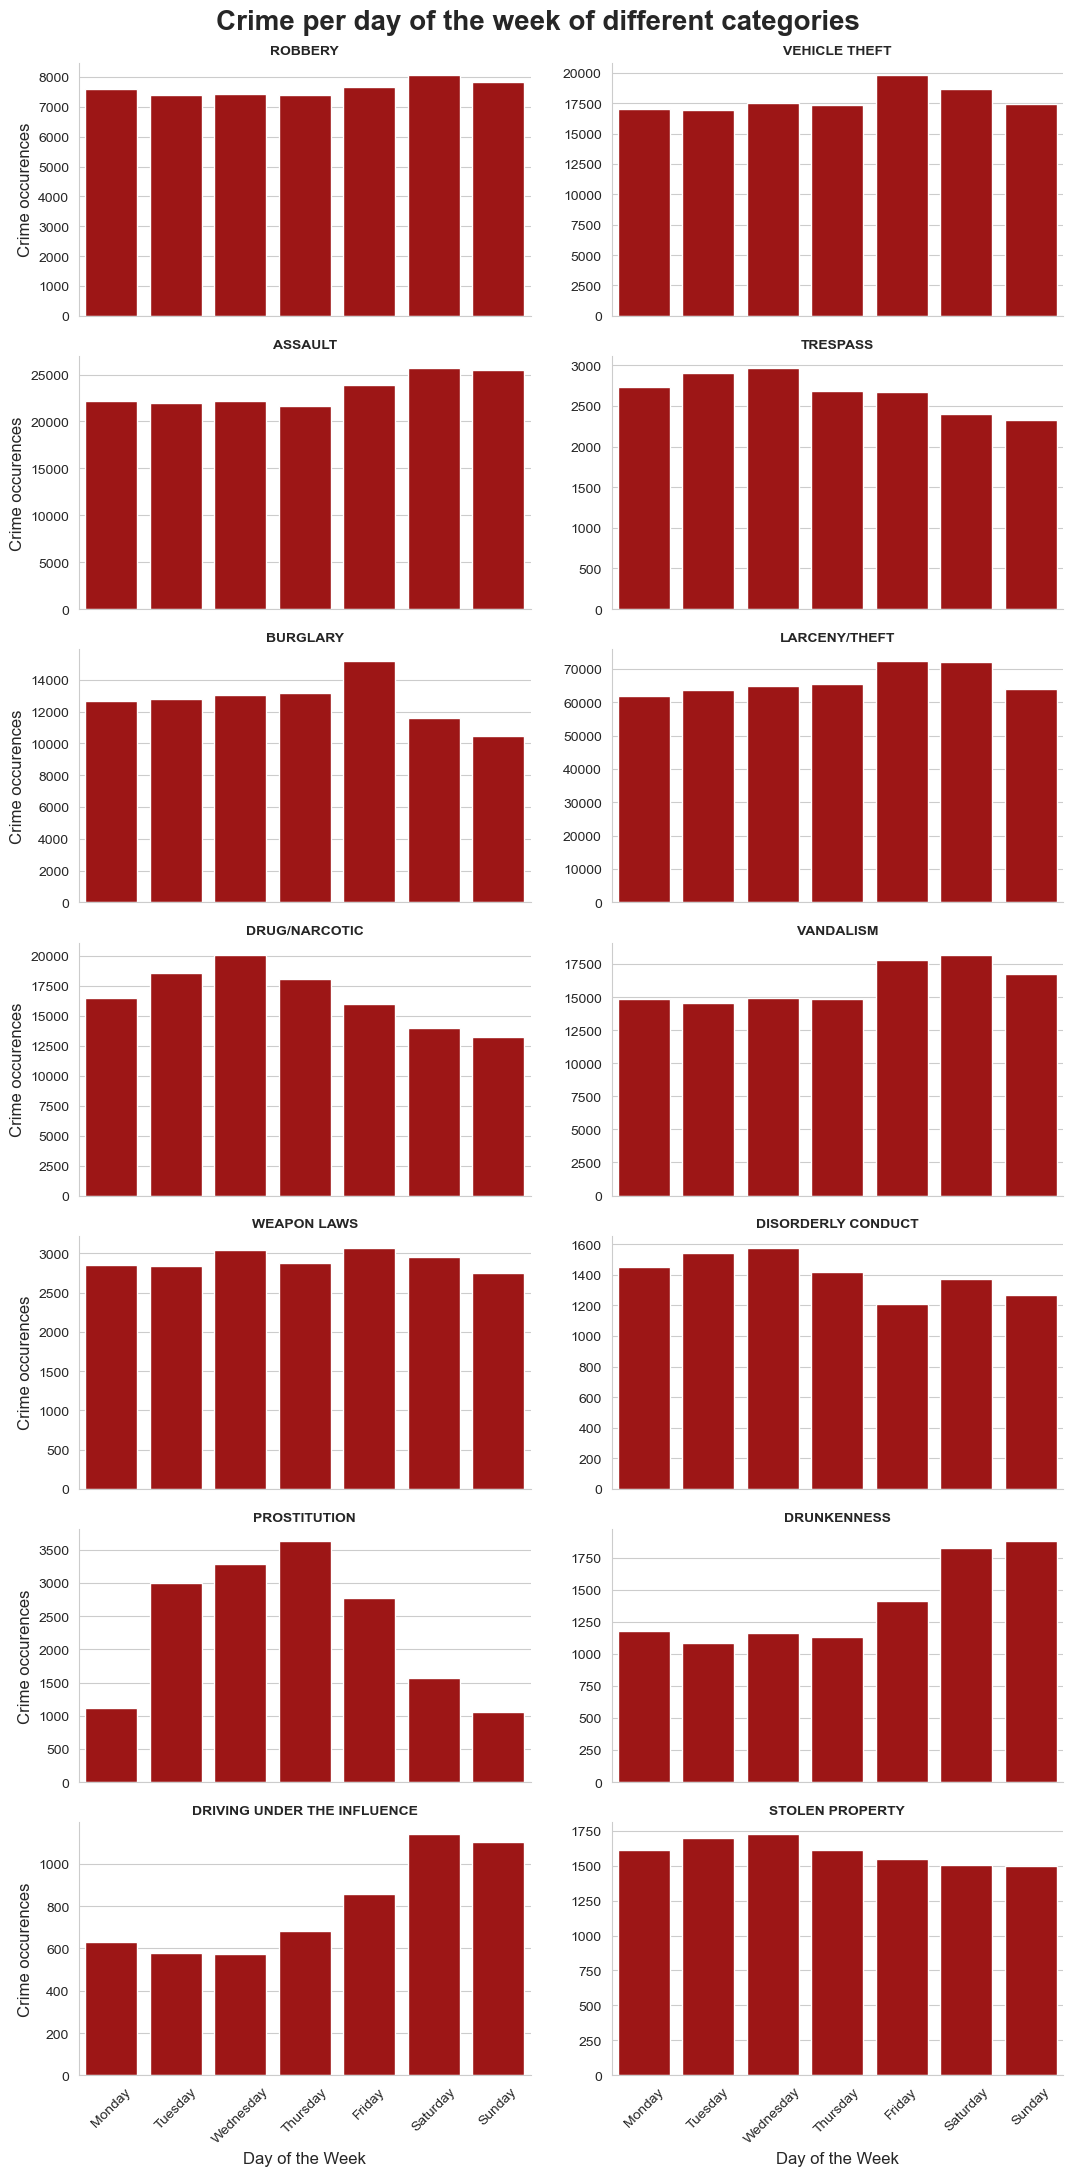

In [4]:
# Plot of different crime categories per day of the week using seaborns catplot
sns.set_style("whitegrid")
plot_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
g=sns.catplot(x="DayOfWeek", data=data, kind="count", col="Category", col_wrap=2, sharey=False, color="#B30000", 
              order=plot_order, height=3, aspect=1.8)
g.fig.suptitle("Crime per day of the week of different categories", y=1.01, weight="bold", fontsize=20)
g.set_titles("{col_name}", weight="bold")
g.set_xlabels("Day of the Week", fontsize=12)
g.set_ylabels("Crime occurences", fontsize=12)
# rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

# Comments on crimes per day of the week
* Several of the crime categories behave as we would expect across different days of the week. This includes **Driving under the influence** and **Drunkenness** who both peak on Friday and Saturday when people usually go out to bars and parties. **Vehicle theft**, **Larceny/theft** and **Assault** also have a slight peak during the weekend.

* We imagined other crime categories would be related to drinking and therefore also peak during the weekend. This is the case for "Vandalism", which also peaks in the weekend. However, this is not the case for **Prostitution**, **Drug/Narctoic** and **Disorderly conduct** who all peak during mid week and then descend a lot on weekends.

* It is also interesting to note that **Burglary** has a high peak on Fridays and then have much fewer occurences on Saturday and Sunday. Similarly, **Tresspass** peaks during the week and then fall on the weekend. 

* Several other crime categories does not vary much across the days of the week, such as **Stolen Property**, **Weapon Laws** and **Robbery**. 

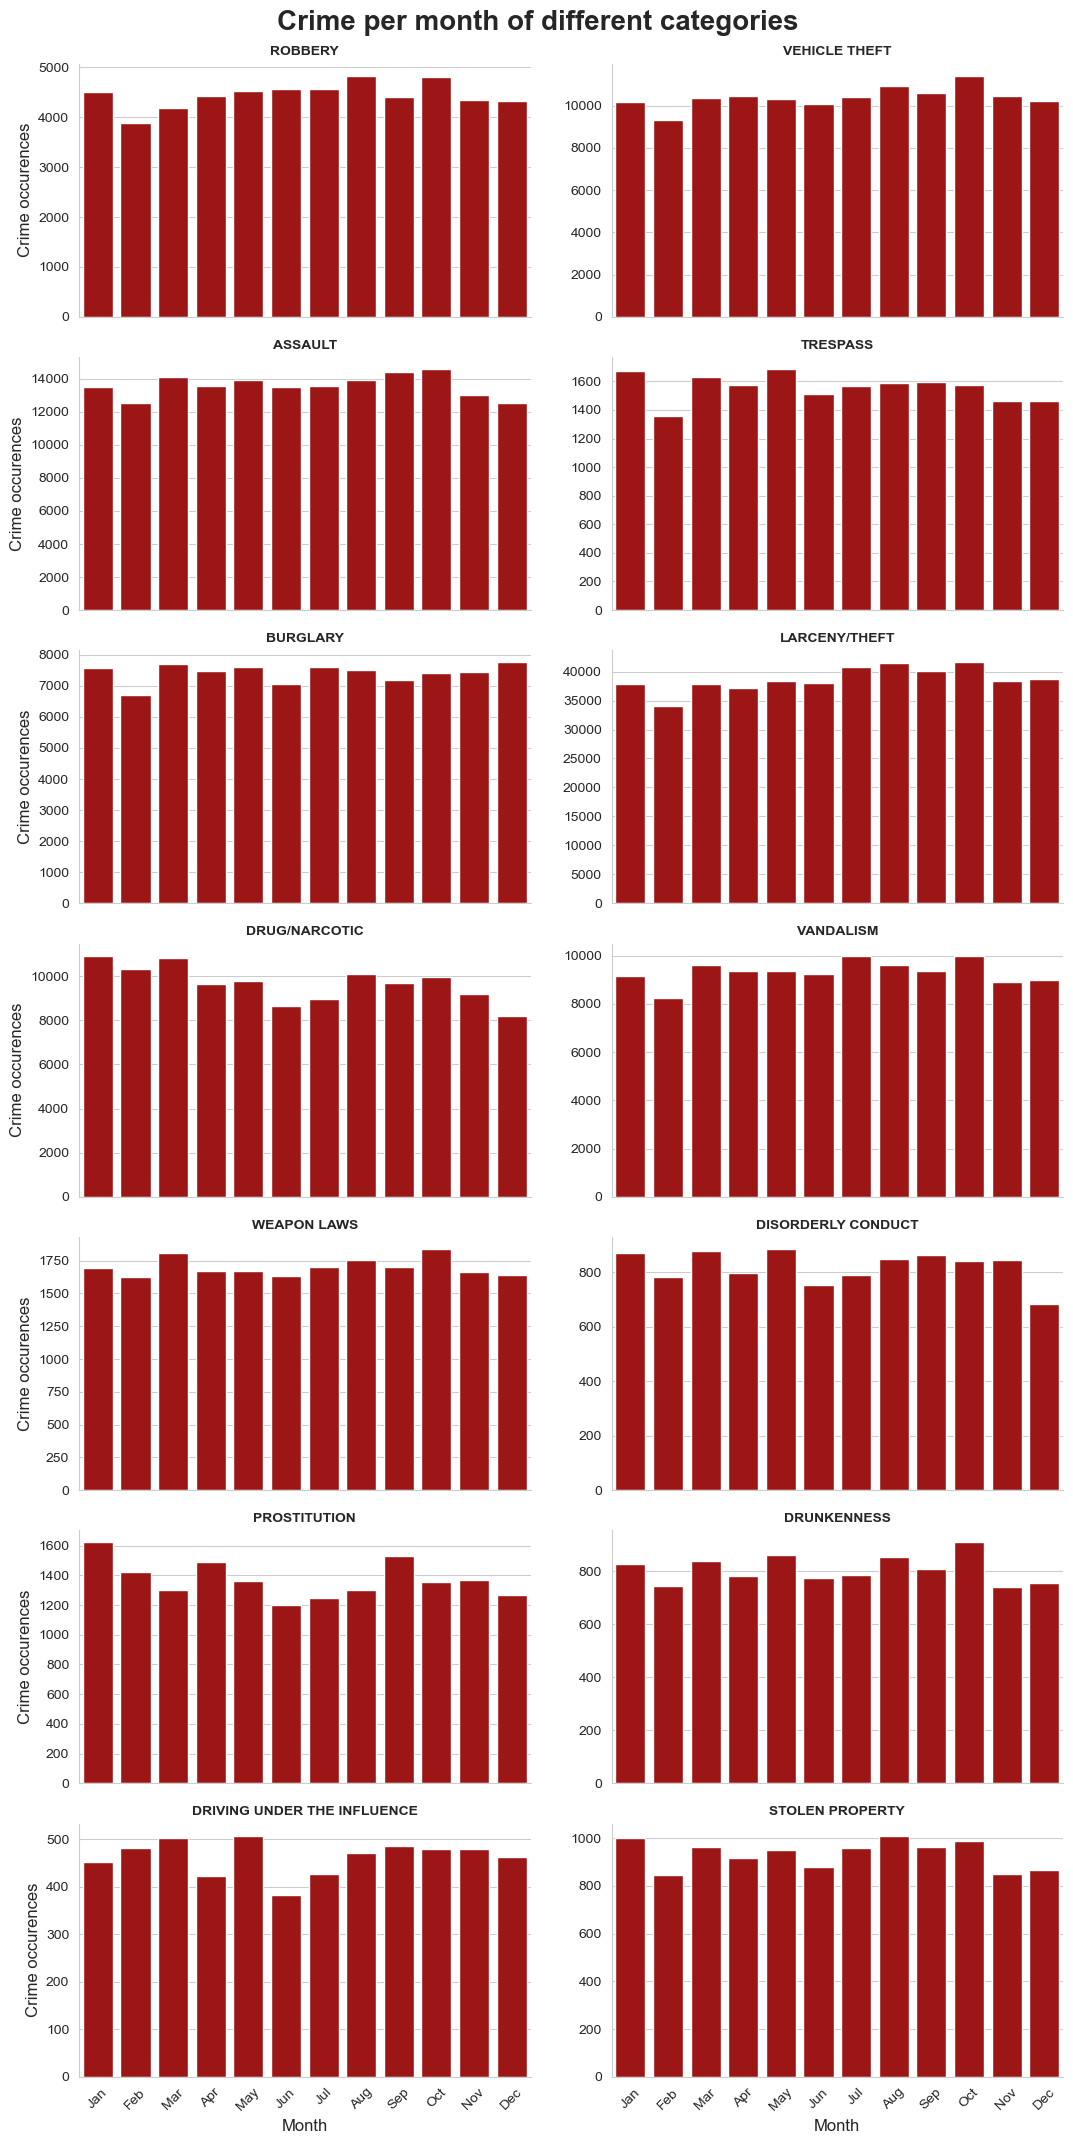

In [5]:
# Plot of different crime categories per month using seaborns catplot
sns.set_style("whitegrid")
plot_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
g=sns.catplot(x="MonthOfYear", data=data, kind="count", col="Category", col_wrap=2, sharey=False, color="#B30000", 
              order=plot_order, height=3, aspect=1.8)
g.fig.suptitle("Crime per month of different categories", y=1.01, weight="bold", fontsize=20)
g.set_titles("{col_name}", weight="bold")
g.set_xlabels("Month", fontsize=12)
g.set_ylabels("Crime occurences", fontsize=12)
# rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

# Comments on crimes per month
* Almost all of the different crime categories have different variances across the months. 

* Across some categories there is a peak in the fall around October before the crime occurences then fall during November and December and then rise again in January. This is the case for **Robbery**, **Assault**, **Drunkennes** and **Stolen Property**.

* Several crime types have fewer occurences during the summer months of June and July. This is the case for **Driving under the infuence**, **Prostitution**, **Drunkennes**, **Disorderly Conduct** and **Drug Narcotic**. For these crime types, they do not have an obvious pattern in common for when they peak.

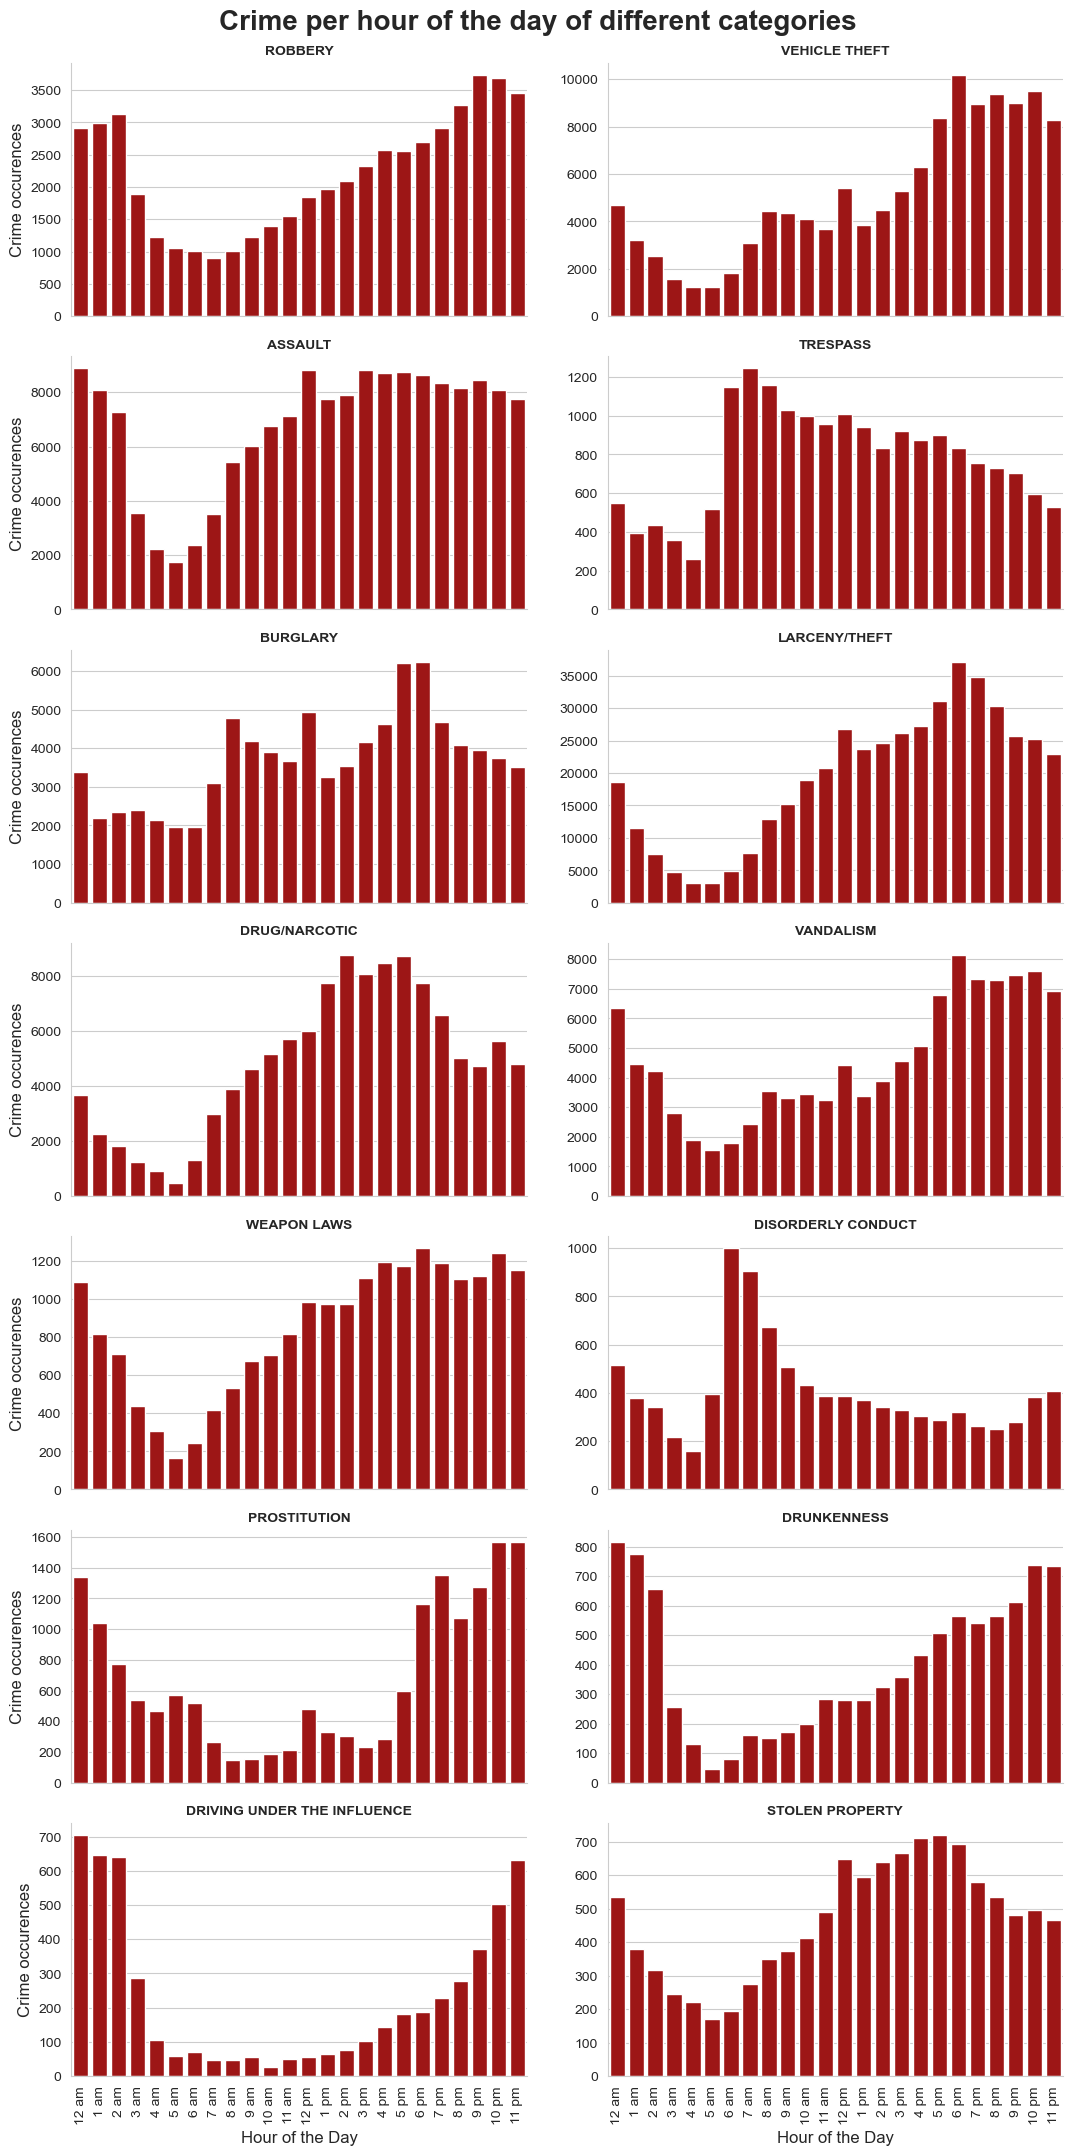

In [6]:
# Plot of different crime categories per hour of the day using seaborns catplot
sns.set_style("whitegrid")
g=sns.catplot(x="Hour", data=data, kind="count", col="Category", col_wrap=2, sharey=False, color="#B30000", 
                height=3, aspect=1.8)
g.fig.suptitle("Crime per hour of the day of different categories", y=1.01, weight="bold", fontsize=20)
g.set_titles("{col_name}", weight="bold")
g.set_xlabels("Hour of the Day", fontsize=12)
g.set_ylabels("Crime occurences", fontsize=12)
# rename x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(["12 am", "1 am", "2 am", "3 am", "4 am", "5 am", "6 am", "7 am", "8 am", "9 am", "10 am", "11 am", "12 pm", "1 pm", "2 pm", "3 pm", "4 pm", "5 pm", "6 pm", "7 pm", "8 pm", "9 pm", "10 pm", "11 pm"])
# rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

# Comments on crimes per hour of the day
* Pretty much all of the crime categories follow a similar pattern across the hours of the day with very few occurences during the very early mornings of the hour and then peak during the late afternoon or during the late evening and night.

* Crimes that peak during the late afternoon are **Stolen Property**, **Weapon Laws**, **Vandalism**, **Drug/Narcotics**, **Burglary**, **Larceny/Theft** and **Vehicle Theft**

* Crimes that peak during the late evening and night are **Driving under the influence**, **Drunkenness**, **Prostitution** and **Robbery**.

* Looking at crime occurences for **Disorderly conduct**, we see a surprising pattern where disorderly conduct peaks between 5 am and 8 am. The interesting part however, is that in the hours leading up to the peak, the number of occurences fall to very very few, it's lowest actually, and then it rises very suddenly. A similar pattern can be seen for **Tresspass**

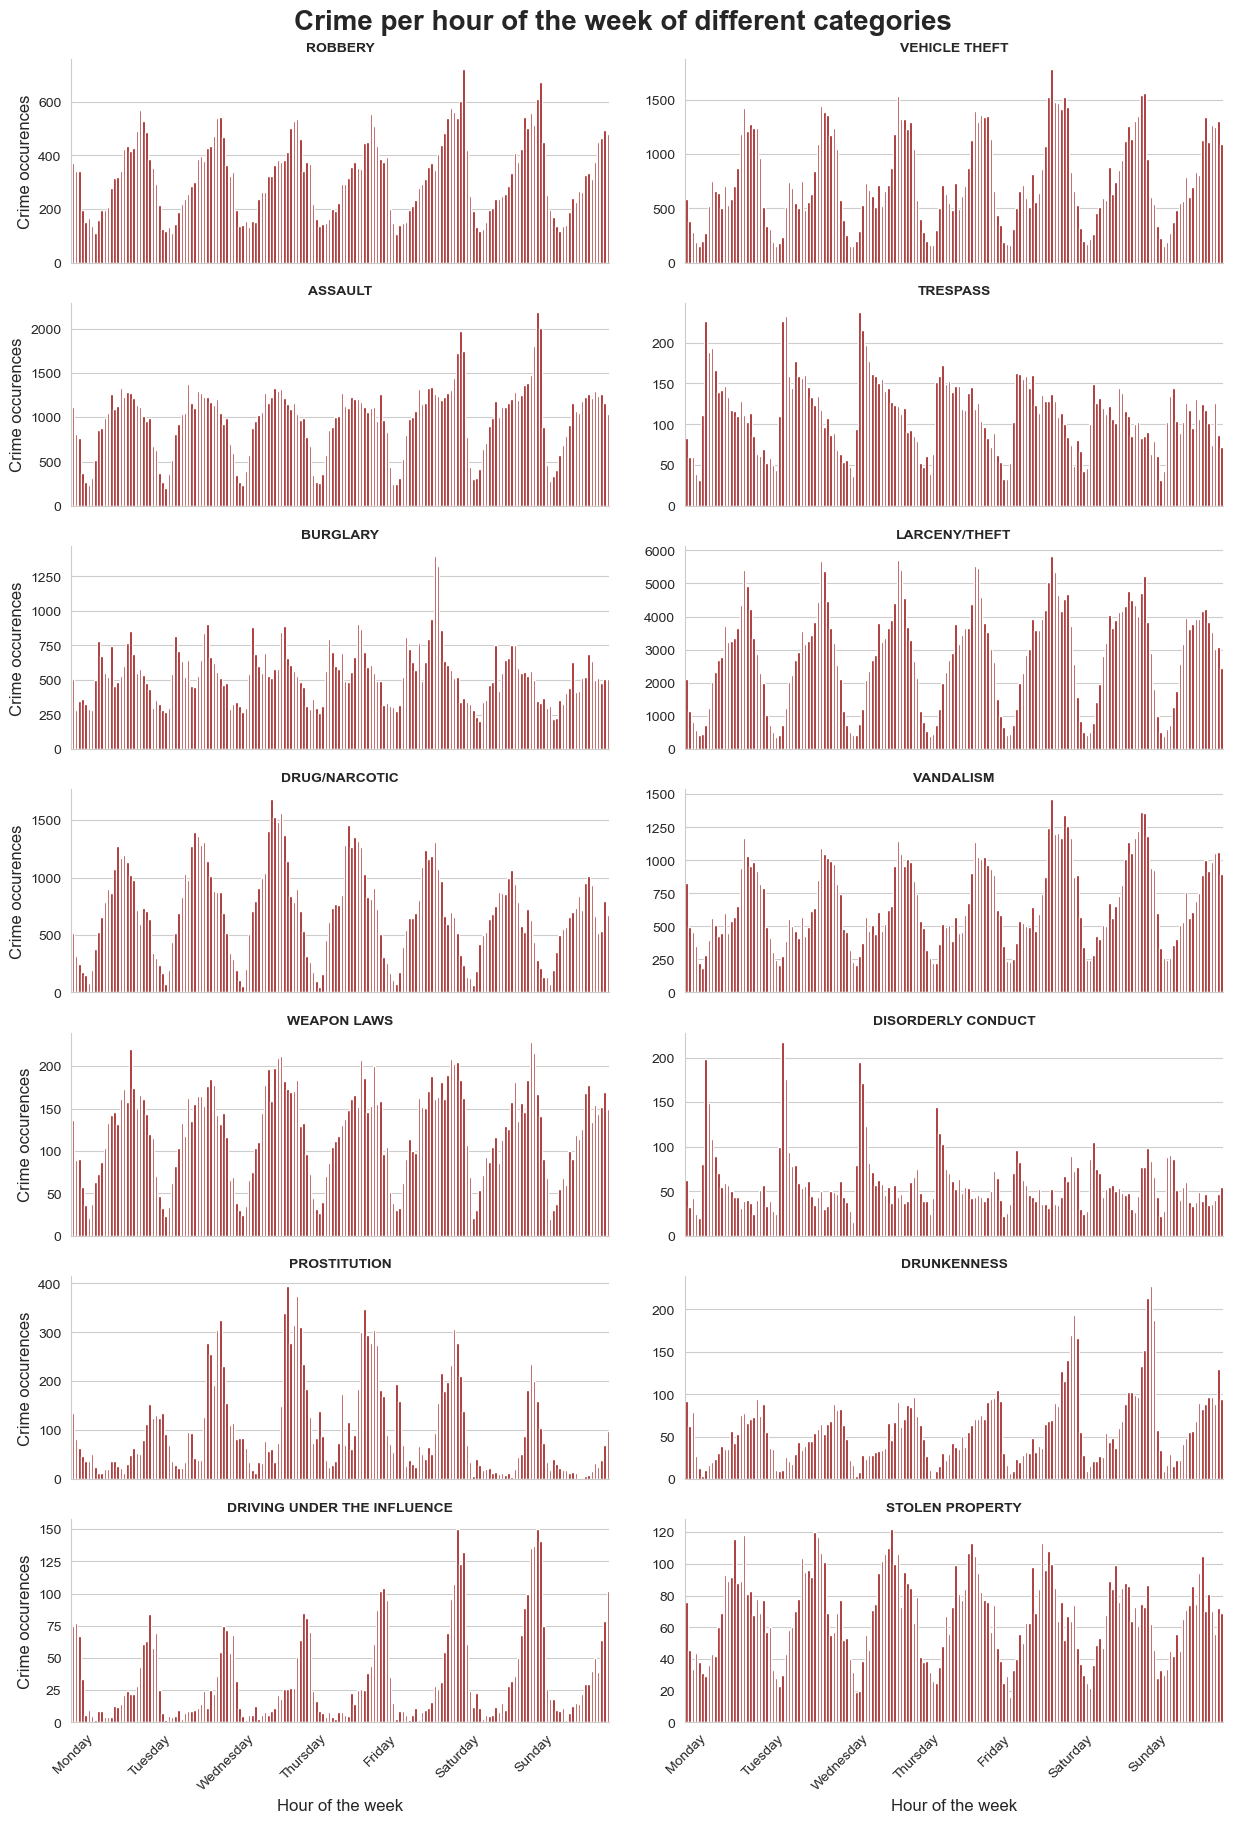

In [7]:
# Plot of different crime categories per month using seaborns catplot
sns.set_style("whitegrid")
g=sns.catplot(x="Week_hour", data=data, kind="count", col="Category", col_wrap=2, sharey=False, color="#B30000", 
               height=2.5, aspect=2.5)
g.fig.suptitle("Crime per hour of the week of different categories", y=1.01, weight="bold", fontsize=20)
g.set_titles("{col_name}", weight="bold")
g.set_xlabels("Hour of the week", fontsize=12)
g.set_ylabels("Crime occurences", fontsize=12)
# display day of the week on the x-axis
for ax in g.axes.flat:
    ax.set_xticks([0, 24, 48, 72, 96, 120, 144])
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
# rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

# Comments on crimes per hour of the week
* When looking at the different crimes over the hours of the entire week, we can confirm many of the patterns that we have already seen in previous plots. But at the same, this visualizations sheds light on some new interesting insights, such as:

    * **Burglary**: The late afternoon peak we earlier saw for burglary, has an unusual and very large spike on Friday afternoon.

    * **Assault**: On the previous plot we saw that assault occurences are high both during the late afternoon and late evening/night. With this visualization we can see that the late afternoon occurences primarily peak during the week days, whereas the late evening/night occurences peak on Friday and Saturday. A similar pattern can be seen for **Robbery**.

# Calendar plot
We have chosen to look more into the crime category **Assault**, as we have seen some patterns that would be interesting to further explore. Furthermore, it has a lot of occurences so that we have sufficient data to work with.

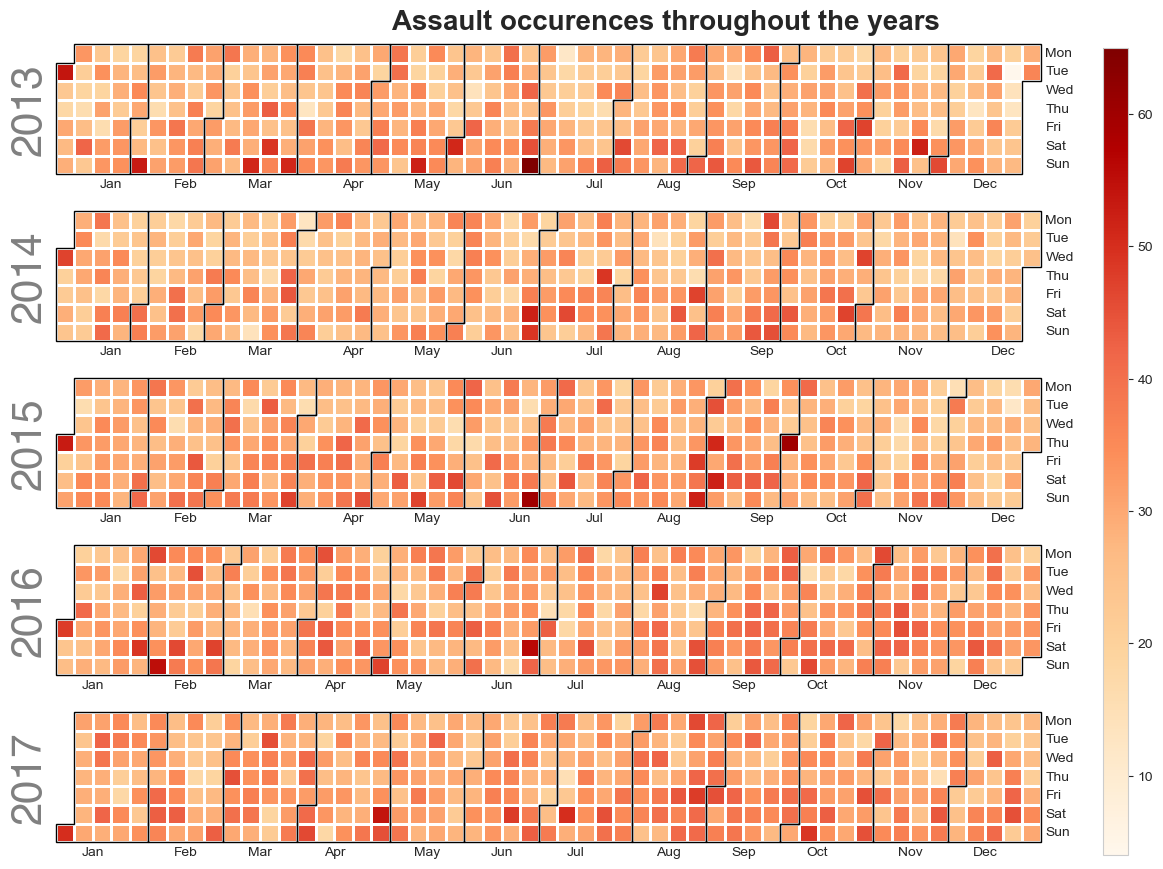

In [8]:
# Filter for Assault crimes and data for the latest 5 years
data_assault = data[data.Category == "ASSAULT"]
data_assault = data_assault[data_assault['Date'].dt.year.isin(range(2013, 2018))]
# Create a calendar plot of Assault crimes using calplot
data_assault.set_index('Date', inplace=True)
title = 'Assault occurences throughout the years'
calplot.calplot(data_assault['Category'], how='count', cmap='OrRd', colorbar=True, suptitle=title, edgecolor='black')
plt.suptitle(title, weight="bold", fontsize=20, y=1.02)
plt.show()


# Comments on calendar plot
* The calender plot is a type of visualization where we can look at many dimensions at the same time. We have a total of four dimensions; day of the week, month and year as well as number of occurences displayed as color. 

* There are a few intersting patterns that we can spot from the calendar plot, but in general we would argue that this type of visualization tries to pack too much information into one visualization, making it dificult for the human eye to read and make comparisons across the dimensions.  

* One interesting observation though, is the 1st of January of every year with many assaults compared to the 31st of December with less assaults. We would imagine to find a similar observation for other important party celebrations during the year. Comparing New Years Day with eg. San Francisco Carnaval (last weekend in May) and Independence Day (4th of July), we can see that these events do not have high assault occurences. However, when comparing to San Francisco Pride (last weekend in June), we see a spike in assault occurences every year, just like for New Years Day.

# Polar bar chart
We have chosen to look more into **Disorderly conduct**, as we also saw some intersting patterns for this type of crime.

In [9]:
# Filter for Disorderly Conduct crimes and prepare data for polar bar chart
data_discon = data[data.Category == "DISORDERLY CONDUCT"]
data_discon['Hour'] = data_discon["Hour"].apply(str)
data_discon = data_discon.groupby(['Hour']).size().reset_index(name='counts')
data_discon = data_discon.sort_values(by=['counts'], ascending=False)
data_discon = data_discon.reset_index(drop=True)

# Create a polar bar chart using plotly.graph_objects
fig = go.Figure(data=[go.Barpolar(
    r=data_discon['counts'],
    theta=data_discon['Hour'],
    marker_color= "#B30000",
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8
)])
fig.update_layout(
    title="Number of disorderly conduct crimes for each hour of the day",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1200]
        )),
    showlegend=False
)
fig.show()

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_26877/3234626532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_discon['Hour'] = data_discon["Hour"].apply(str)


In [10]:
data_discon = data[data.Category == "DISORDERLY CONDUCT"]
data_discon = data_discon.groupby(['Hour']).size().reset_index(name='counts')
data_discon = data_discon.sort_values(by=['Hour'])
data_discon['Hour'] = data_discon["Hour"].apply(str)
data_discon = data_discon.reset_index(drop=True)

# Create a polar bar chart using plotly.graph_objects
fig = go.Figure(data=[go.Barpolar(
    r=data_discon['counts'],
    theta=data_discon['Hour'],
    marker_color= "#B30000",
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8
)])
fig.update_layout(
    title="Number of disorderly conduct crimes for each hour of the day",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1200]
        )),
    showlegend=False
)
fig.show()

# Comments on polar bar chart
* The polar bar chart for disorderly conduct crimes over the 24 hours of the day shows us the same results as the bar chart of hours of the day above, but in a different visualizations. By having it sorted by maximum number of occurences it clearly shows us which hours of the day have the most occurences and which has the fewest.

* Although polar bar charts are a cool looking and different visualization type, we would argue that a simple bar chart is a better solution for visualizing crimes over the hours of the day. This is because it is easier for the human eye to compare sizes on the bar chart compared to the polar bar chart. Furthermore, the polar bar chart requires much more data preparation and code to create, compared to the bar chart, which is much quicker and simpler to create.

# Part 2: Data Viz Questions

**Mention 10 examples of ways we can encode data.**

    1. Position
    2. Length
    3. Area
    4. Shape
    5. Color
    6. Angle
    7. Texture
    8. Size
    9. Nodes
    10. Links


**Are all encodings created equally? Why not? Can you think of an example from the previous lectures?**

All encodings are not created equally as each type of encoding serves a different purpose of revealing insights from data. For example position, nodes and links are very good at showing data points located on a map and the connections between them. But these type of encodings are not intented for showing aggregations of numerical data, for which encodings such as length and shape are better. 

**Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?**

1. Angle - it is hard for the human eye to compare angles that are very close to each other.
2. Links - If there are too many data points, links really quickly become difficult for the human eyes to parse, as there are too many links overlapping each other.
3. Texture - texture is as such not dificult for the human eye to parse, but it is very rare that it is a good choice to use them in a data visualization. It can work for displaying categorical variables, but it will most of the time be a better idea to distinguish the variables by the use of color or a label with text.

An example of an online visualization, where using links as an encoding type becomes hard for the human eyes to parse, can be seen here: https://ciat.cgiar.org/project/where-our-food-crops-come-from/
It is an example of a Chord Diagram, where there is simply too much information for one visualization making the links overlap and almost imposible to see how and where they connect.

**Explain in your own words: What is the problem with pie-charts?**

Pie charts is not a good visualization type as it uses angles as encodings. It therefore becomes very dificult for the human eye to compare pieces of the pie, especially when they are close in size or there are many pieces of the pie. For some reason pie charts continue to be a popular visualization type for many companies, especially among elder decision makers. As a data analyst, you can often end in a discussion with senior decision makers on whether to use a pie chart. Therefore it is important to be able to give a good explination of why another visualization type would be a better idea. However, if you have to use pie charts, it is important to include additional encodings in the visualization, such as sorting and labelling it, in order to make the insights stand out.

# Part 3: Visualizing geodata using plotly
Create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays. To do this we will first create a subset of the data looking only on **Sundays** and **Vehicle Theft**

In [11]:
# Filter data for Vehicle Theft crimes and prepare data for choropleth map
data_veh = data[data['Category'] == 'VEHICLE THEFT'] 
data_veh = data_veh[data_veh['DayOfWeek'] == 'Sunday']
data_veh = data_veh.groupby('PdDistrict')['PdId'].count().reset_index(name='Vehicle_Theft')

# Load geojson file for San Francisco
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

counties["features"][0]

# Create a choropleth map using plotly.express
fig = px.choropleth_mapbox(data_veh, geojson=counties, locations='PdDistrict', color='Vehicle_Theft',
                           color_continuous_scale="OrRd",
                           range_color=(data_veh.Vehicle_Theft.min(), data_veh.Vehicle_Theft.max()),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'Vehicle Theft':'number of crimes'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

From the figure choropleth map above, it is clearly visualized that the worse area to park on a Sunday is in Ingleside as well as the sorrounding areas of Bayview and Mission. The best area to park is in the central district of Tenderloin.

Although we can make a quick conclusion on where it is safest to park your car from the above visualization, we need to be carefull before we jump to final conclusions in order not to make perceptual errors. 

* We tried changing both the day of the week as well as the year and month parameter to see if the difference between district becomes less evident. However, the same conlcusions are made across all days of the week, months and years.

* Perceptual errors are a problem as it causes us to jump to quick solutions that satisfy our expectations without thinking too much about it. And we might have done so with this choropleth map. The visualization also uses size of the districts as an encoding and it is clear to see that Ingleside is a much larger area than Tenderloin. If we also had available data on population size for each district, we could create the same visualization, but instead of showing absolute number of vehicle thefts, we could show vehicle thefts per capita. This would give us a better idea of where it is the safest to park your car. 

# Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4).

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.
 * In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
 * Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).  
 * Find your own example of human noise in the data and visualize it.


## Vivi

* As for the prostitution data, the binned data suggests that Thursday is a hotspot for prostitution. However, if we plot the years into a calendar plot, we can see that's not the case. After 2013, the distribution of the data changed drastically, with most of the days having zero observations and generally Thursdays having a large number of reports. Presumably, they started filing the prostitution reports on only Thursdays, and thus completely throwing off the distribution along the days of the week (and also the hours, because there are days where most of the data is dated for the same point in time).
* In the second example, it's a basic human phenomenon, where we like to round the minutes when talking about it, thus creating the illusion of more crime taking place at whole increments. 
* The Hall of Justice as a hotspot for sex offenses can possibly be explained by reports taking place there and people not caring enough to write down the real place where it occurred, but only the address of the police HQ. 

## Thomas

## Part 5: Errors in the data. 

##### Question:
In each of the examples below, describe in your own words how the data-errors, can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

##### Answer:

**1. In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday.**

*While exploring weekly patterns for each crime category, it can be seen that prostitution exhibits a significant rise during Thursday. However, once we plot the crime ratio of each category per district, we observe that prostitution happens a lot in some neighborhoods like the `NORTHERN`, `CENTRAL`, `MISSION` districts and very little in the others. This means that a misconception can be formed about Thursday being a high prostitution day all over San Francisco, while only three districts indicate higher activity.*


**2. Crimes didn't appear to be recorded as frequently in between round numbers.**

*Probably due to convenience, police officers seem to not note down the exact minute a crime has occured. This leads to a misconception that crimes in San Francisco mostly occur around round number hours (e.g. exactly at 13.00 or 13.30). In addition, this means that if we were interested in creating a model for crime prediction, timestamps  would not be used as a feature because the dataset would suffer a significant reduction due to the many hours of the day that lack crime records.*

**3. The Hall of Justice seemed to be an unlikely hotspot for sex offences.**

*The San Francisco Hall of Justice, is one of the headquarters of the San Francisco Police Department and San Francisco County Superior Court. Obviously, it would be very risky for a sex offender to commit a crime there since most people in that area would be police officers in duty. This however, raises a question of whether internal sex offences made by the police itself get covered up.*

##### Question:

Find your own example of human noise in the data and visualize it. Comment your results.

##### Answer:

*Looking through the `DRUNKENNESS` rates for each day of the week, we can observe that during Saturday and Sunday there is a high occurence. What is peculiar, however, is that Friday rates (a day when most people go out and drink) are a lot fewer that those in Sunday.*


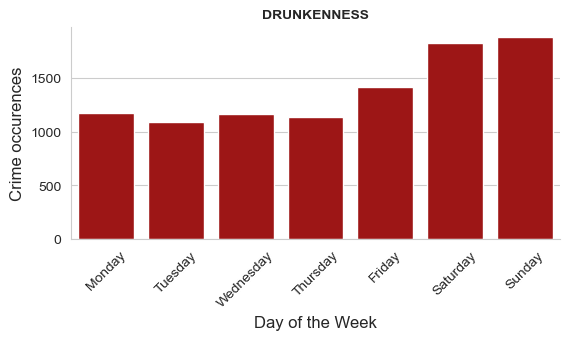

In [12]:
# Plot of Drunkenness crime per day of the week using seaborns catplot
sns.set_style("whitegrid")
plot_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
g=sns.catplot(x="DayOfWeek", data=data[data.Category=='DRUNKENNESS'], kind="count", col="Category", col_wrap=2, sharey=False, color="#B30000", 
              order=plot_order, height=3, aspect=1.8)
g.set_titles("{col_name}", weight="bold")
g.set_xlabels("Day of the Week", fontsize=12)
g.set_ylabels("Crime occurences", fontsize=12)
# rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

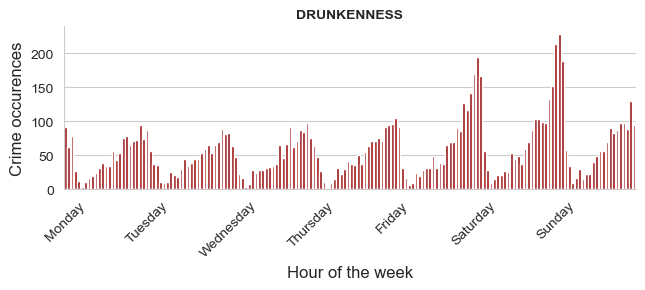

In [13]:
# Plot of Drunkenness crime per week hour using seaborns catplot
sns.set_style("whitegrid")
g=sns.catplot(x="Week_hour", data=data[data.Category=='DRUNKENNESS'], kind="count", col="Category", col_wrap=2, sharey=False, color="#B30000", 
               height=2.5, aspect=2.5)
g.set_titles("{col_name}", weight="bold")
g.set_xlabels("Hour of the week", fontsize=12)
g.set_ylabels("Crime occurences", fontsize=12)
# display day of the week on the x-axis
for ax in g.axes.flat:
    ax.set_xticks([0, 24, 48, 72, 96, 120, 144])
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
# rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.show()

*In the above plot we can see Friday(green), Saturday(blue) and Sunday(red) **hourly** occurences of drunkenness incidents. Sunday values are indeed very high, higher than on Friday, however, the time factor makes a huge difference. The time that Sunday incidents are occuring is around 12-3 am. Similar high rates can also been seen during the early hours of Saturday. This changes a lot our perspective about which day exhibits the highest drunkenness since the early hours of Sunday are considered a Saturday shift for police officers. We can, therefore, conclude that Friday actually has more drunkenness incidents than Sunday! This, more in-depth, conclusion can guide the police to better choose the shift hours.*

## Soren